In [1]:
import pandas as pd
import numpy as np 

In [2]:
df = pd.read_csv('C:/Users/Admin/Downloads/IMDB Dataset.csv')

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.shape #We have reviews for 50,000 Movies

(50000, 2)

In [5]:
df.isnull().sum() #There are no null values as well!

review       0
sentiment    0
dtype: int64

<AxesSubplot:ylabel='sentiment'>

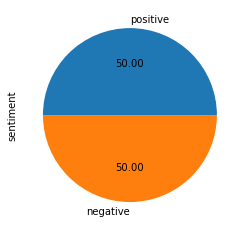

In [6]:
df['sentiment'].value_counts().plot(kind='pie' , autopct='%0.2f') #the data is balanced 

In [7]:
df.duplicated().sum() 

418

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.head(4)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative


In [11]:
#Removing the html tags
import re

def remove_html(text):
    return re.sub(re.compile('<.*?>'),'',text)

In [12]:
df['review'] = df['review'].apply(remove_html)

In [13]:
df.head() #Html tags have been removed

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [14]:
df['review'] = df['review'].str.lower()

In [15]:
df['review'][2]

'i thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. the plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). while some may be disappointed when they realize this is not match point 2: risk addiction, i thought it was proof that woody allen is still fully in control of the style many of us have grown to love.this was the most i\'d laughed at one of woody\'s comedies in years (dare i say a decade?). while i\'ve never been impressed with scarlet johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.this may not be the crown jewel of his career, but it was wittier than "devil wears prada" and more interesting than "superman" a great comedy to go see with friends.'

In [16]:
#Removing the https links
def remove_links(text):
    return re.sub(r'https\S+',"",text)

In [17]:
df['review'] = df['review'].apply(remove_links)

In [18]:
#Removing Punctuation 

In [19]:
import string 
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [20]:
exclude = string.punctuation

In [21]:
exclude

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
def remove_punc(text):
    return text.translate(str.maketrans('','',exclude))

In [23]:
df['review'] = df['review'].apply(remove_punc)

In [24]:
df['review'][0]

'one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty pictur

In [25]:
df['review'][2] #all the punctutation marks have been removed

'i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watching a lighthearted comedy the plot is simplistic but the dialogue is witty and the characters are likable even the well bread suspected serial killer while some may be disappointed when they realize this is not match point 2 risk addiction i thought it was proof that woody allen is still fully in control of the style many of us have grown to lovethis was the most id laughed at one of woodys comedies in years dare i say a decade while ive never been impressed with scarlet johanson in this she managed to tone down her sexy image and jumped right into a average but spirited young womanthis may not be the crown jewel of his career but it was wittier than devil wears prada and more interesting than superman a great comedy to go see with friends'

In [26]:
#Removing stopwords

In [27]:
import nltk

In [28]:
from nltk.corpus import stopwords

In [29]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [30]:
sw = stopwords.words('english')

In [31]:
def remove_stopwords(text):
    x = []
    for word in text.split():
        if word in sw:
            x.append('')
        else:
            x.append(word)
    return ' '.join(x)

In [32]:
df['review'][0]

'one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty pictur

In [33]:
remove_stopwords(df['review'][0])

'one    reviewers  mentioned   watching  1 oz episode youll  hooked   right    exactly  happened  methe first thing  struck   oz   brutality  unflinching scenes  violence  set  right   word go trust      show   faint hearted  timid  show pulls  punches  regards  drugs sex  violence   hardcore   classic use   wordit  called oz     nickname given   oswald maximum security state penitentary  focuses mainly  emerald city  experimental section   prison    cells  glass fronts  face inwards  privacy   high   agenda em city  home  manyaryans muslims gangstas latinos christians italians irish  moreso scuffles death stares dodgy dealings  shady agreements  never far awayi would say  main appeal   show  due   fact   goes   shows wouldnt dare forget pretty pictures painted  mainstream audiences forget charm forget romanceoz doesnt mess around  first episode  ever saw struck    nasty   surreal  couldnt say   ready      watched   developed  taste  oz  got accustomed   high levels  graphic violence  

In [34]:
df['review'] = df['review'].apply(remove_stopwords)

In [35]:
from nltk.tokenize import word_tokenize , sent_tokenize

In [36]:
word_tokenize(df['review'][0])

['one',
 'reviewers',
 'mentioned',
 'watching',
 '1',
 'oz',
 'episode',
 'youll',
 'hooked',
 'right',
 'exactly',
 'happened',
 'methe',
 'first',
 'thing',
 'struck',
 'oz',
 'brutality',
 'unflinching',
 'scenes',
 'violence',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'show',
 'faint',
 'hearted',
 'timid',
 'show',
 'pulls',
 'punches',
 'regards',
 'drugs',
 'sex',
 'violence',
 'hardcore',
 'classic',
 'use',
 'wordit',
 'called',
 'oz',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'focuses',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cells',
 'glass',
 'fronts',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'em',
 'city',
 'home',
 'manyaryans',
 'muslims',
 'gangstas',
 'latinos',
 'christians',
 'italians',
 'irish',
 'moreso',
 'scuffles',
 'death',
 'stares',
 'dodgy',
 'dealings',
 'shady',
 'agreements',
 'never',
 'far',
 'awayi',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'f

In [37]:
def no_words(text):
    return len(word_tokenize(text))

In [38]:
df['no_of_words'] = df['review'].apply(no_words)

In [39]:
df.head()

,review,sentiment,no_of_words
0,one reviewers mentioned watching 1 oz e...,positive,168
1,wonderful little production filming techniqu...,positive,84
2,thought wonderful way spend time hot s...,positive,86
3,basically theres family little boy jake thi...,negative,67
4,petter matteis love time money visually s...,positive,125


In [40]:
import seaborn as sns

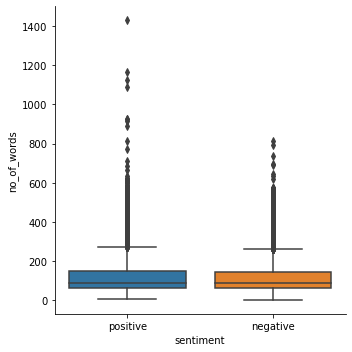

In [41]:
sns.catplot(x='sentiment' , y='no_of_words' , kind='box' , data=df)

In [42]:
#Model Building 

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
lb = LabelEncoder()

In [47]:
df['sentiment'] = lb.fit_transform(df['sentiment'])

In [48]:
df

,review,sentiment,no_of_words
0,one reviewers mentioned watching 1 oz e...,1,168
1,wonderful little production filming techniqu...,1,84
2,thought wonderful way spend time hot s...,1,86
3,basically theres family little boy jake thi...,0,67
4,petter matteis love time money visually s...,1,125
...,...,...,...
49995,thought movie right good job wasnt crea...,1,85
49996,bad plot bad dialogue bad acting idiotic direc...,0,57
49997,catholic taught parochial elementary schoo...,0,115
49998,im going disagree previous comment side ...,0,115


In [50]:
from sklearn.feature_extraction.text import CountVectorizer

In [52]:
cv = CountVectorizer(max_features=10000)

In [53]:
X = cv.fit_transform(df['review']).toarray()

In [54]:
X.shape

(49582, 10000)

In [55]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [58]:
X[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [63]:
Y = df['sentiment'].values.reshape(-1,1)

In [64]:
Y

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.3)

In [68]:
X_train.shape

(34707, 10000)

In [69]:
from sklearn.naive_bayes import MultinomialNB

In [70]:
mb = MultinomialNB()

In [71]:
mb.fit(X_train,Y_train)

C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MultinomialNB()

In [72]:
from sklearn.metrics import accuracy_score

In [73]:
Y_pred = mb.predict(X_test)

In [74]:
print(accuracy_score(Y_test,Y_pred))

0.8498151260504202


In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [76]:
tf = TfidfVectorizer(max_features = 10000)

In [83]:
Xt = tf.fit_transform(df['review']).toarray()

In [84]:
Xt_train , Xt_test , Y_train , Y_test = train_test_split(Xt, Y , test_size=0.3)

In [85]:
mb.fit(Xt_train,Y_train)

C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MultinomialNB()

In [86]:
y_pred = mb.predict(Xt_test)

In [88]:
print('Accuracy score using Tf-IDf Method:',accuracy_score(y_pred,Y_test))

Accuracy score using Tf-IDf Method: 0.863327731092437


In [91]:
import pickle

In [94]:
pickle.dump(tf,open('vectorizer.pkl','wb'))

In [95]:
pickle.dump(mb,open('multimodel.pkl','wb'))

In [ ]:
#

In [116]:
text = input('Enter the review:--> ')

Enter the review:--> Starting of the movie was good. But the climax was disturbing. I would not recommend the movie to kids as well as adult. As the movie approaches it gets worsen. The movie goes off track and is a total time pass


In [117]:
text = text.lower()
text = remove_punc(text)
text = remove_stopwords(text)
vector_input = tf.transform([text])
output = mb.predict(vector_input)[0]

In [118]:
if output == 1:
    print('Positive')
else:
    print('Negative')

Negative
